In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import datetime as dt
import yfinance as yf

years = 10

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

In [3]:
import edhec_risk_kit_205 as erk

d:\github\ftu2\Fin2 - PM using Python\Lecture 3_ Factor Investing\edhec_risk_kit_205.py:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "returns":
d:\github\ftu2\Fin2 - PM using Python\Lecture 3_ Factor Investing\edhec_risk_kit_205.py:46: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
d:\github\ftu2\Fin2 - PM using Python\Lecture 3_ Factor Investing\edhec_risk_kit_205.py:49: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


In [11]:
vw_rets_49 = pd.read_csv(r"D:\github\ftu2\Fin2 - PM using Python\Data\ind30_m_vw_rets.csv", index_col=0, na_values=-99.99) / 100

In [14]:
vw_rets_49

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
201809,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
201810,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
201811,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


In [15]:
log_returns = np.log(vw_rets_49 / vw_rets_49.shift(1))
log_returns = log_returns.dropna()
log_returns.head()

c:\Users\HP\anaconda3\envs\qntdev\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\HP\anaconda3\envs\qntdev\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
193112,1.223581,-0.308536,0.025891,-0.002632,0.718197,0.182322,2.383919,0.384945,0.207762,-0.430935,...,0.146206,1.913753,0.273712,0.219037,-0.369599,0.227857,0.508850,-0.089698,0.628549,1.169499
193204,0.609089,-0.144601,0.785227,0.069112,0.187565,-0.659644,0.746329,1.126306,1.054552,1.071515,...,0.224355,1.234744,1.361124,1.258584,0.347370,-2.239616,0.560737,1.006805,0.239425,0.180578
193205,0.567061,0.951488,0.774200,0.612791,0.617570,0.886487,-0.275801,0.544545,-1.185132,0.680623,...,-0.136418,-0.815486,-0.558231,-0.633186,0.302525,2.059435,0.635800,0.278659,0.449115,-0.156480
193305,-1.089644,1.104910,-1.280692,-0.140962,-0.749718,-1.178526,-0.464415,-0.457850,-0.481920,-0.294692,...,0.273014,2.095273,-0.559937,-1.085254,0.156204,0.219064,-0.973882,0.923745,-0.490397,0.009668
193306,0.163545,-0.912702,-0.665218,-1.051385,0.110476,-1.039135,-2.370974,-0.815731,-0.899238,-0.657540,...,-0.503369,-1.023010,-0.559166,-1.022643,-0.856571,-0.141590,-0.024023,-0.764264,-0.348911,-1.039597


ValueError: Data must be 1-dimensional

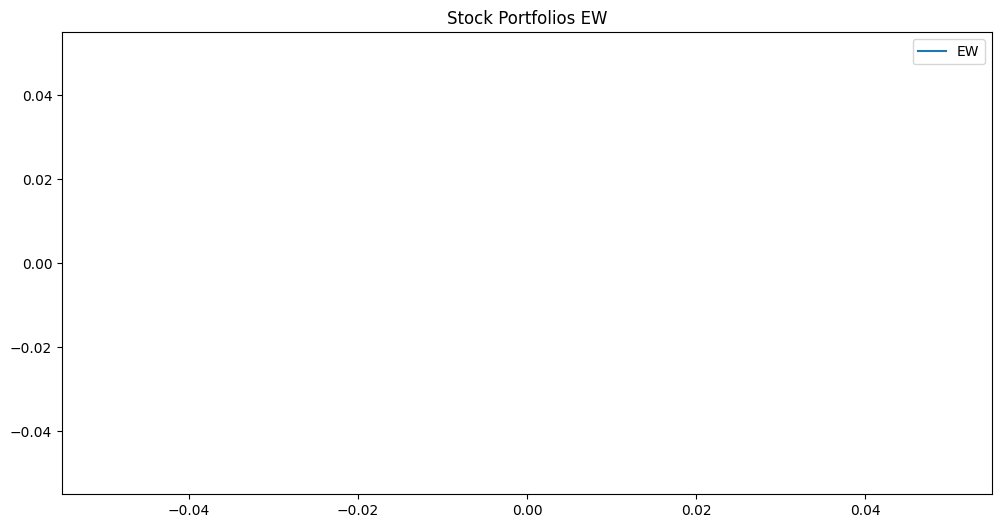

In [16]:
ewr = erk.backtest_ws(log_returns, estimation_window=250, weighting=erk.weight_ew)
btr = pd.DataFrame({"EW": ewr})
(1+btr).cumprod().plot(figsize=(12,6), title="Stock Portfolios EW")
erk.summary_stats(btr.dropna())

In [12]:
def sample_cov(r, **kwargs):
    """
    Returns the sample covariance of the supplied returns
    """
    return r.cov()

def weight_gmv(r, cov_estimator=sample_cov, **kwargs):
    """
    Produces the weights of the GMV portfolio given a covariance matrix of the returns 
    """
    est_cov = cov_estimator(r, **kwargs)
    return erk.gmv(est_cov)


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.190773,0.221097,-0.710838,15.025622,0.021498,0.034171,0.757300,-0.393160
GMV-Sample,0.076741,0.163313,-0.363853,13.552297,0.015480,0.025333,0.340648,-0.363631


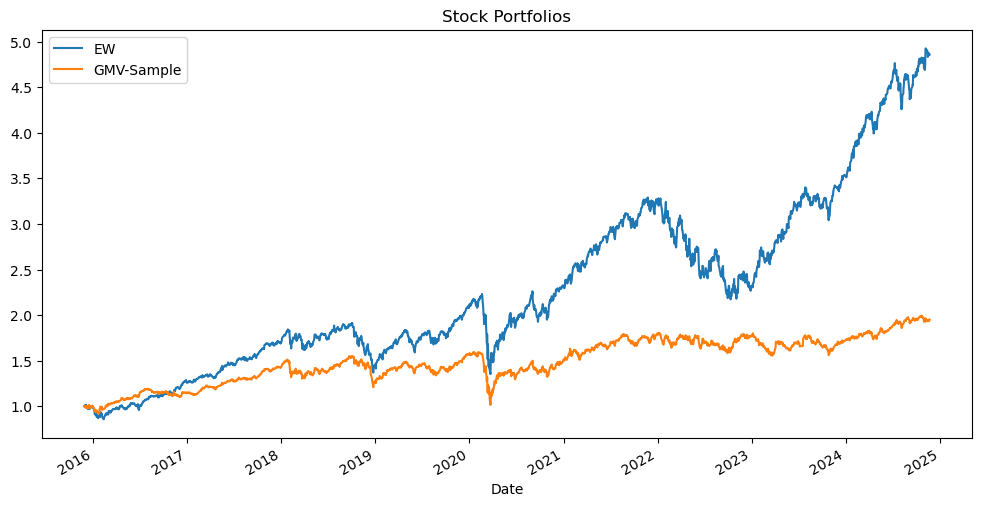

In [13]:
mv_s_r = erk.backtest_ws(log_returns, estimation_window=250, weighting=weight_gmv, cov_estimator=sample_cov)
btr = pd.DataFrame({"EW": ewr, "GMV-Sample": mv_s_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Stock Portfolios")
erk.summary_stats(btr.dropna())

In [14]:
#import statsmodels.stats.moment_helpers as mh
def cc_cov(r, **kwargs):
    """
    Estimates a covariance matrix by using the Elton/Gruber Constant Correlation model
    """
    rhos = r.corr()
    n = rhos.shape[0]
    # this is a symmetric matrix with diagonals all 1 - so the mean correlation is ...
    rho_bar = (rhos.values.sum()-n)/(n*(n-1))
    ccor = np.full_like(rhos, rho_bar)
    np.fill_diagonal(ccor, 1.)
    sd = r.std()
    ccov = ccor * np.outer(sd, sd)
#     mh.corr2cov(ccor, sd)
    return pd.DataFrame(ccov, index=r.columns, columns=r.columns)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.190773,0.221097,-0.710838,15.025622,0.021498,0.034171,0.757300,-0.393160
GMV-Sample,0.076741,0.163313,-0.363853,13.552297,0.015480,0.025333,0.340648,-0.363631
GMV-CC,0.070131,0.167439,-0.252294,13.238341,0.015647,0.025620,0.293546,-0.362896


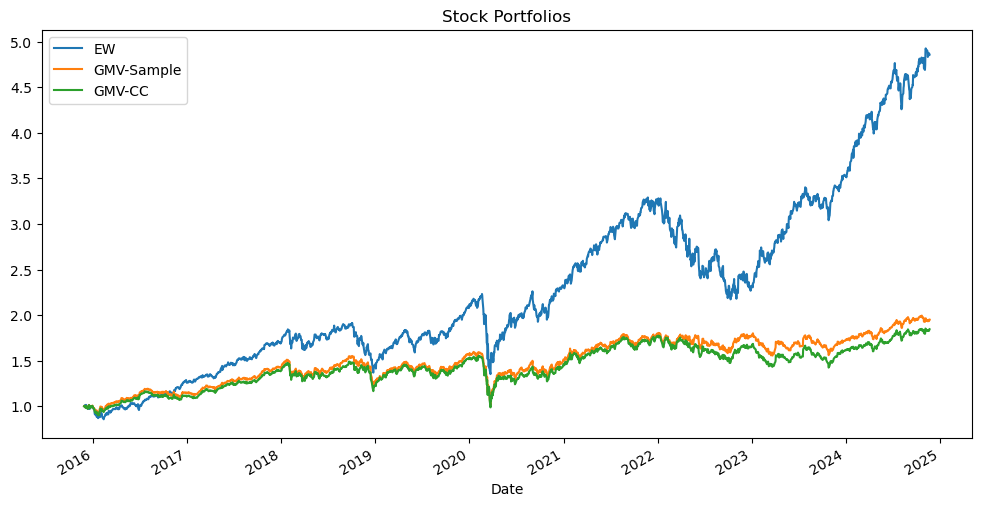

In [15]:
mv_cc_r = erk.backtest_ws(log_returns, estimation_window=250, weighting=weight_gmv, cov_estimator=cc_cov)
btr = pd.DataFrame({"EW": ewr, "GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Stock Portfolios")
erk.summary_stats(btr.dropna())

In [17]:
from sklearn.decomposition import FactorAnalysis

In [20]:
def factor_cov(r, **kwargs):
    """
    Estimates a covariance matrix by using the factor model
    """
    n_factors = 2
    fa = FactorAnalysis(n_components = n_factors)
    fa.fit(r)
    factor_loadings = fa.components_.T #Transpose for dimentional matching
    factor_covariance = np.dot(factor_loadings,factor_loadings.T) + np.diag(fa.noise_variance_)
    return pd.DataFrame(factor_covariance, index=r.columns, columns = r.columns)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.190773,0.221097,-0.710838,15.025622,0.021498,0.034171,0.757300,-0.393160
GMV-Sample,0.076741,0.163313,-0.363853,13.552297,0.015480,0.025333,0.340648,-0.363631
GMV-CC,0.070131,0.167439,-0.252294,13.238341,0.015647,0.025620,0.293546,-0.362896
GMV-Factor,0.073222,0.163864,-0.361335,13.845065,0.015478,0.025237,0.318446,-0.365923


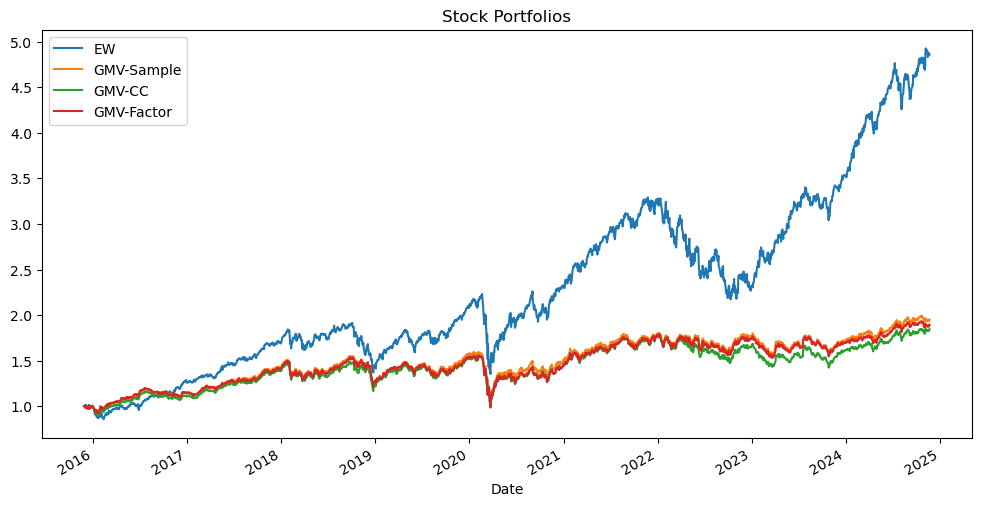

In [21]:
mv_factor_r = erk.backtest_ws(log_returns, estimation_window=250, weighting=weight_gmv, cov_estimator=factor_cov)
btr = pd.DataFrame({"EW": ewr, "GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r,"GMV-Factor": mv_factor_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Stock Portfolios")
erk.summary_stats(btr.dropna())

In [22]:
def riskmetrics_cov(returns, lambda_=0.94):
    """
    Compute the RiskMetrics (EWMA) covariance matrix for asset returns.
    
    Parameters:
    - returns (DataFrame): DataFrame of asset returns (rows: time, columns: assets).
    - lambda_ (float): Decay factor (default: 0.94, as recommended by RiskMetrics).
    
    Returns:
    - cov_matrix (ndarray): EWMA covariance matrix at the end of the dataset.
    """
    # Initialize variables
    n_assets = returns.shape[1]
    cov_matrix = np.zeros((n_assets, n_assets))
    
    # Compute EWMA covariance matrix
    for t in range(1, len(returns)):
        current_returns = returns.iloc[t].values.reshape(-1, 1)
        previous_cov_matrix = cov_matrix
        outer_product = current_returns @ current_returns.T
        
        cov_matrix = lambda_ * previous_cov_matrix + (1 - lambda_) * outer_product

    return cov_matrix

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.190773,0.221097,-0.710838,15.025622,0.021498,0.034171,0.757300,-0.393160
GMV-Sample,0.076741,0.163313,-0.363853,13.552297,0.015480,0.025333,0.340648,-0.363631
GMV-CC,0.070131,0.167439,-0.252294,13.238341,0.015647,0.025620,0.293546,-0.362896
GMV-Factor,0.073222,0.163864,-0.361335,13.845065,0.015478,0.025237,0.318446,-0.365923
GMV-Riskmetrics,0.101641,0.165567,-0.318609,13.135939,0.015565,0.025727,0.483465,-0.323353


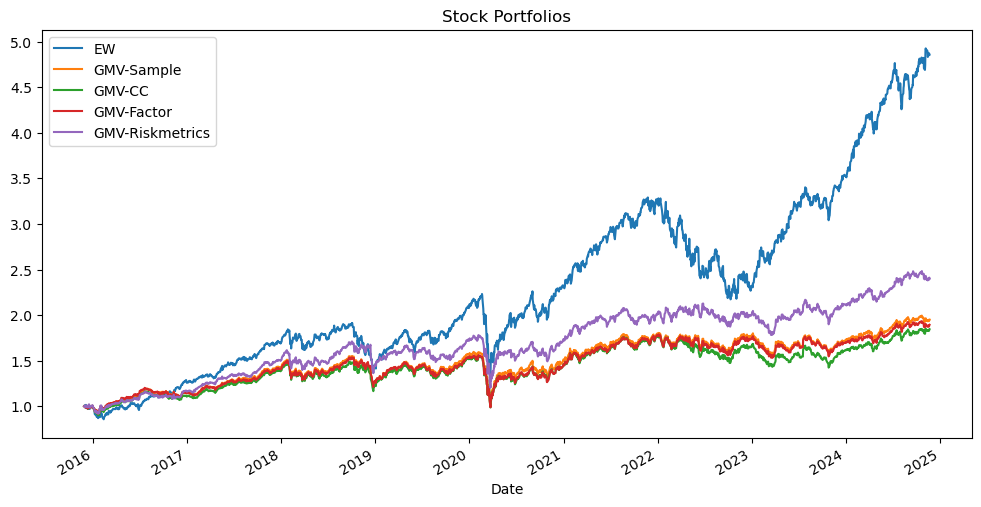

In [23]:
mv_ewma_r = erk.backtest_ws(log_returns, estimation_window=250, weighting=weight_gmv, cov_estimator=riskmetrics_cov)
btr = pd.DataFrame({"EW": ewr, "GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r,"GMV-Factor": mv_factor_r,"GMV-Riskmetrics": mv_ewma_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Stock Portfolios")
erk.summary_stats(btr.dropna())